<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/TwoWayANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
bike_sharing_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/bike_sharing_data_processed.csv')
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


We will focus on the weather situation and season for the two-way ANOVA

In [16]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [17]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [18]:
rp.summary_cont(bike_sharing_data.groupby(['weathersit']))['cnt']

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


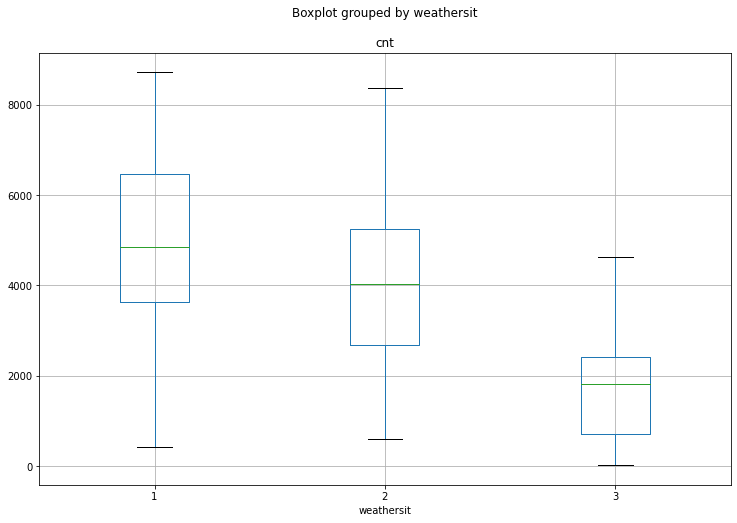

In [19]:
# visualize the data
bike_sharing_data.boxplot(column=['cnt'], by='weathersit', figsize=(12, 8))
# there appears to be a big difference

In [20]:
rp.summary_cont(bike_sharing_data.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


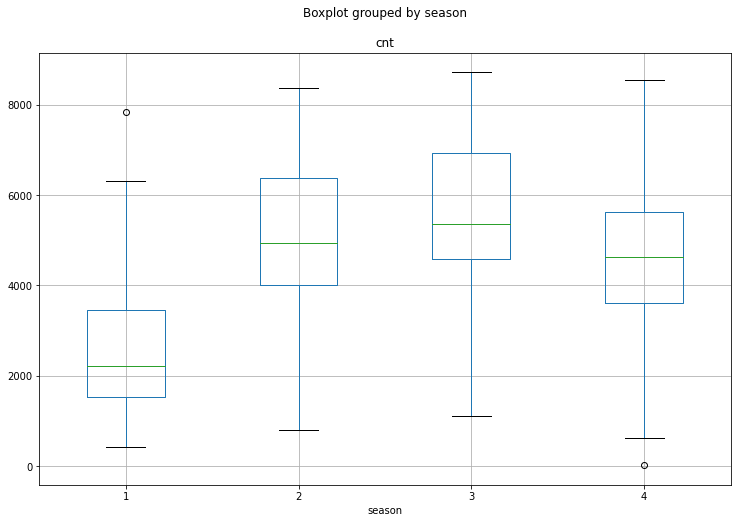

In [21]:
bike_sharing_data.boxplot(column=['cnt'], by='season', figsize=(12, 8))


In [22]:
model = ols('cnt ~ C(weathersit)', bike_sharing_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.11e-17
Time:                        02:39:56   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

Looking at the Intercept, C(weathersit)[T.2] and C(weatersit)[T.3], we see a p-value of 0 for each, so we can reject the null hypothesis which means that every regression variable is significant

In [23]:
model = ols('cnt ~ C(season)', bike_sharing_data).fit() # now we'll do the same thing with season
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           6.72e-67
Time:                        02:58:01   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [24]:
model = ols('cnt ~ C(weathersit) + C(season)', bike_sharing_data).fit() # Now we will look at both together
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.13e-87
Time:                        02:59:13   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

The above information all show that the regression is significant

In [26]:
 # we will use the latest model which includes both the weater situation and the season to perform our two-way ANOVA
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


The very small p-values above indicate that both the weather situation and the season have a significant impact on bike rentals

Now let's look at how the weather situation and the seasons interact with each other

In [29]:
# * says to consider the interaction between the categorical features
model = ols('cnt ~ C(weathersit) * C(season)', bike_sharing_data).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           5.25e-85
Time:                        03:05:06   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

When we look at the above p-values, we can see that some of the interactions are significant while others are not

In [30]:
sm.stats.anova_lm(model) # run an ANOVA analysis on this regression analysis

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN
